In [1]:
import tensorflow as tf

In [2]:
a = tf.Variable(1, name= "a")
b = tf.Variable(2, name = "b")
f = a+b

tf.print("Sum ->", f)

Sum -> 3


In [3]:
import numpy as np 
from tensorflow.keras.datasets import mnist

In [4]:
num_classes = 10 #no of digits (0-9)
num_features = 784 #image shape

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

In [7]:
#flattening

X_train, X_test = X_train.reshape([-1, num_features]), X_test.reshape([-1, num_features])

In [8]:
X_train, X_test = X_train / 255., X_test / 255. #normalise to come within rgb

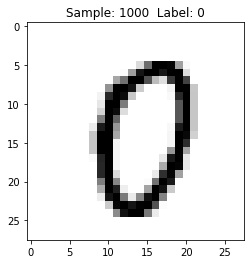

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

def display_sample(num):
    #Print this sample's label 
    label = y_train[num] 
    
    #Reshape the 784 values to a 28x28 image
    image = X_train[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1000)

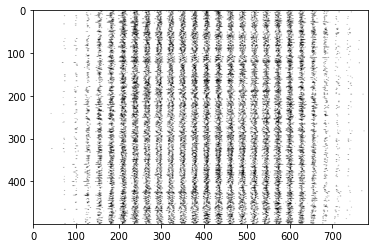

In [10]:
images = X_train[0].reshape([1,784])
for i in range(1, 500):
    images = np.concatenate((images, X_train[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [11]:
learning_rate = 0.001
training_steps = 3000
batch_size = 250
display_step = 100

n_hidden = 512 #neurons

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.repeat().shuffle(60000).batch(batch_size).prefetch(1)

In [14]:
random_normal = tf.initializers.RandomNormal()

weights = {
    "h":tf.Variable(random_normal([num_features, n_hidden])),
    'out': tf.Variable(random_normal([n_hidden, num_classes]))

}
biases = {
    'b': tf.Variable(tf.zeros([n_hidden])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [15]:
#model creation

def neural_net(inputData):
    hidden_layer = tf.add(tf.matmul(inputData, weights['h']), biases['b'])
    hidden_layer = tf.nn.sigmoid(hidden_layer)
    out_layer = tf.matmul(hidden_layer, weights['out']) + biases['out']
    return tf.nn.softmax(out_layer)


In [16]:
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth = num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9,1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))  

In [17]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

def run_optimisation(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [18]:
def accuracy(y_pred, y_true):

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


In [19]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimisation(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("Training epoch: %i, Loss: %f, Accuracy: %f" % (step, loss, acc))

Training epoch: 100, Loss: 158.954117, Accuracy: 0.848000
Training epoch: 200, Loss: 104.726761, Accuracy: 0.896000
Training epoch: 300, Loss: 94.071739, Accuracy: 0.920000
Training epoch: 400, Loss: 87.145187, Accuracy: 0.904000
Training epoch: 500, Loss: 78.792419, Accuracy: 0.896000
Training epoch: 600, Loss: 84.782608, Accuracy: 0.900000
Training epoch: 700, Loss: 94.211075, Accuracy: 0.884000
Training epoch: 800, Loss: 67.699562, Accuracy: 0.936000
Training epoch: 900, Loss: 86.854851, Accuracy: 0.904000
Training epoch: 1000, Loss: 86.705643, Accuracy: 0.896000
Training epoch: 1100, Loss: 84.630531, Accuracy: 0.900000
Training epoch: 1200, Loss: 71.564713, Accuracy: 0.916000
Training epoch: 1300, Loss: 68.126907, Accuracy: 0.932000
Training epoch: 1400, Loss: 80.520050, Accuracy: 0.908000
Training epoch: 1500, Loss: 80.557480, Accuracy: 0.904000
Training epoch: 1600, Loss: 59.231552, Accuracy: 0.896000
Training epoch: 1700, Loss: 62.377533, Accuracy: 0.912000
Training epoch: 1800,